Do you want to use the predefined example graph? (yes/no): yes
Shortest path from A to C: ['A', 'B', 'D', 'F', 'C']
Total distance: 12


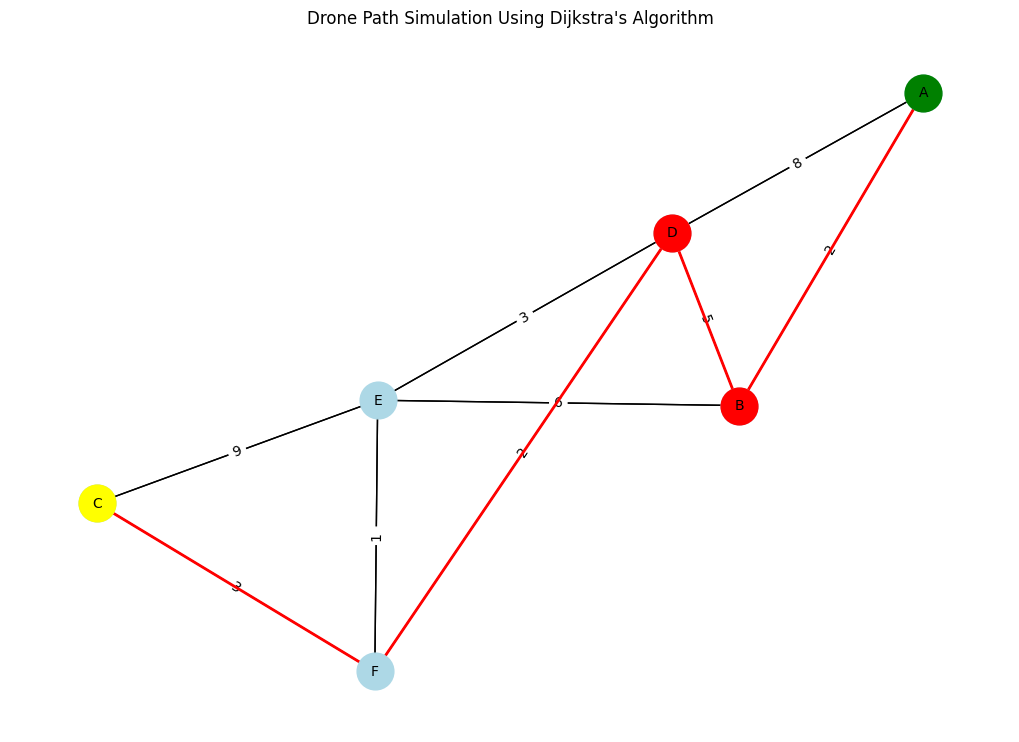

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def find_shortest_path(graph, source_node, destination_node):
    """
    Dijkstra's algorithm to find the shortest path between two nodes in a weighted graph.
    """
    distances = {node: float('inf') for node in graph}
    distances[source_node] = 0
    min_heap = [(0, source_node)]
    predecessors = {node: None for node in graph}

    while min_heap:
        distance_to_current, current_node = heapq.heappop(min_heap)

        if distance_to_current > distances[current_node]:
            continue

        for adjacent_node, edge_weight in graph[current_node].items():
            new_distance = distance_to_current + edge_weight
            if new_distance < distances[adjacent_node]:
                distances[adjacent_node] = new_distance
                predecessors[adjacent_node] = current_node
                heapq.heappush(min_heap, (new_distance, adjacent_node))

    # Reconstruct the shortest path
    shortest_path = []
    visited_node = destination_node
    while visited_node:
        shortest_path.append(visited_node)
        visited_node = predecessors[visited_node]
    shortest_path.reverse()

    return shortest_path, distances[destination_node]

def display_graph_with_path(graph, selected_path, start_node, destination_node, obstacles):
    """
    Visualize the graph and highlight the shortest path with start, destination, and obstacles.
    """
    nx_graph = nx.Graph()
    for node, adjacent_nodes in graph.items():
        for adjacent_node, edge_weight in adjacent_nodes.items():
            nx_graph.add_edge(node, adjacent_node, weight=edge_weight)

    # Define positions for nodes
    pos = nx.spring_layout(nx_graph)

    # Plot the graph
    plt.figure(figsize=(10, 7))
    nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10)

    # Mark obstacles with red cells
    obstacle_nodes = set(obstacles)
    for node in obstacle_nodes:
        nx.draw_networkx_nodes(nx_graph, pos, nodelist=[node], node_color='red', node_size=700)

    # Mark the start and destination nodes
    nx.draw_networkx_nodes(nx_graph, pos, nodelist=[start_node], node_color='green', node_size=700)
    nx.draw_networkx_nodes(nx_graph, pos, nodelist=[destination_node], node_color='yellow', node_size=700)

    # Draw edges and labels
    nx.draw_networkx_edges(nx_graph, pos)
    nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels={(u, v): d['weight'] for u, v, d in nx_graph.edges(data=True)})

    # Highlight the shortest path in red
    path_edges = list(zip(selected_path, selected_path[1:]))
    nx.draw_networkx_edges(nx_graph, pos, edgelist=path_edges, edge_color='red', width=2)

    # Title and display
    plt.title("Drone Path Simulation Using Dijkstra's Algorithm")
    plt.show()

def input_graph_data():
    """
    Function to input a graph dynamically from the user.
    """
    user_graph = {}
    print("Enter the graph as adjacency list (current_node: adjacent_node1,edge_weight adjacent_node2,edge_weight ...). Type 'done' to finish:")
    while True:
        try:
            input_line = input("Node and adjacent nodes: ").strip()
            if input_line.lower() == 'done':
                break
            if ':' not in input_line:
                print("Check your input. ':' is missing. Please try again.")
                continue

            current_node, adjacent_nodes = input_line.split(':')
            current_node = current_node.strip()
            user_graph[current_node] = {}

            if adjacent_nodes.strip():
                for adjacent_node in adjacent_nodes.split():
                    if ',' not in adjacent_node:
                        print("Check your input format for adjacent nodes. Use 'node,weight'.")
                        continue

                    neighbor_node, neighbor_weight = adjacent_node.split(',')
                    user_graph[current_node][neighbor_node.strip()] = int(neighbor_weight.strip())
        except Exception:
            print("There was an error with your input. Please check and try again.")

    return user_graph

def main():
    """
    Main function to run the Drone Path Simulation program.
    """
    user_choice = input("Do you want to use the predefined example graph? (yes/no): ").strip().lower()

    if user_choice == 'yes':
        # Example graph with obstacles
        graph = {
            'A': {'B': 2, 'D': 8},
            'B': {'A': 2, 'D': 5, 'E':6},
            'C': {'E': 9, 'F': 3},
            'D': {'A': 8, 'B': 5, 'E': 3, 'F': 2},
            'E': {'C': 9, 'B': 6, 'D': 3, 'F':1},
            'F': {'D': 2, 'C': 3, 'E':1}
        }
        obstacles = ['B', 'D']  # Example obstacles

        source_node = 'A'
        destination_node = 'C'

        # Find and display the shortest path
        shortest_path, total_distance  = find_shortest_path(graph, source_node, destination_node)
        print(f"Shortest path from {source_node} to {destination_node}: {shortest_path}")
        print(f"Total distance: {total_distance}")
        display_graph_with_path(graph, shortest_path, source_node, destination_node, obstacles)

    elif user_choice == 'no':
        print("Dynamic Drone Path Simulation Using Dijkstra's Algorithm")
        graph = input_graph_data()

        print("\nGraph structure:")
        for node, adjacent_nodes in graph.items():
            print(f"{node}: {adjacent_nodes}")

        source_node = input("\nEnter the source node: ").strip()
        destination_node = input("Enter the destination node: ").strip()

        if source_node not in graph or destination_node not in graph:
            print("Invalid source or destination node.")
            return

        # User-defined obstacles
        obstacles = input("Enter the obstacles (separated by commas): ").strip().split(',')

        shortest_path, total_distance  = find_shortest_path(graph, source_node, destination_node)
        print(f"\nShortest path from {source_node} to {destination_node}: {shortest_path}")
        print(f"Total distance: {total_distance}")

        display_graph_with_path(graph, shortest_path, source_node, destination_node, obstacles)

    else:
        print("Invalid choice! Please choose 'yes' or 'no'.")

if __name__ == "__main__":
    main()
